Epoch 1/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5308 - accuracy: 0.4405 - val_loss: 1.1742 - val_accuracy: 0.5721
Epoch 2/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.1243 - accuracy: 0.5995 - val_loss: 0.9359 - val_accuracy: 0.6686
Epoch 3/50
1563/1563 [==============================] - 112s 71ms/step - loss: 0.9757 - accuracy: 0.6562 - val_loss: 0.8396 - val_accuracy: 0.7014
Epoch 4/50
1563/1563 [==============================] - 112s 72ms/step - loss: 0.8801 - accuracy: 0.6904 - val_loss: 0.7757 - val_accuracy: 0.7284
Epoch 5/50
1563/1563 [==============================] - 110s 70ms/step - loss: 0.8147 - accuracy: 0.7129 - val_loss: 0.7226 - val_accuracy: 0.7461
Epoch 6/50
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7649 - accuracy: 0.7336 - val_loss: 0.7319 - val_accuracy: 0.7440
Epoch 7/50
1563/1563 [==============================] - 108s 69ms/step - loss: 0.7346 - accuracy: 0.7428 - val_loss: 0

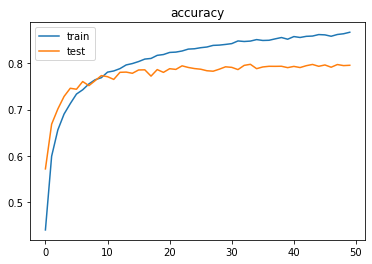

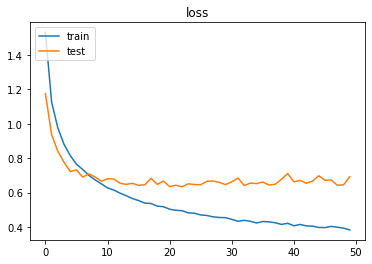

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率＝', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()